# Importing our Data

We will be using the fashion_mnist dataset that comes with keras. It is visually more interesting than the standard mnist datasets which is a collection of hand written digits. While more intersesting, there is one additional step needed if you want to use the fashion mnist dataset, you will need to create a look up to the category names (0 = T-shirt, 1 = Trouser, 2 = Pullover, etc..) for each picture's ground truth label (which is stored as an integer from 1 to 10).

In [1]:
import numpy as np
import keras

(pics, labels), _ = keras.datasets.fashion_mnist.load_data()

label_names = ["T-shirt", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

print(pics.shape)

Using TensorFlow backend.


(60000, 28, 28)


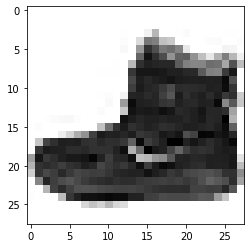

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0], cmap=plt.cm.binary)

In [3]:
pics = np.resize(pics, (60000, 784))
pics.shape

(60000, 784)

In [4]:
pics[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(60000, 784)

In [6]:
pics[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Let's One_Hot_Encode the Labels #

In [7]:
labels[0]

9

In [8]:
from keras.utils import np_utils

labels = np_utils.to_categorical(labels, 10)
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Now Let's Build our Model #

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
def TrainingLoop(number_of_epochs, verbose):
    model.fit(pics, labels, \
              batch_size=128, \
              epochs=number_of_epochs, \
              verbose=verbose, \
              validation_split=.1 )

TrainingLoop(10, 1)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 53us/step - loss: 0.5276 - acc: 0.8121 - val_loss: 0.4386 - val_acc: 0.8408
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.3868 - acc: 0.8603 - val_loss: 0.3648 - val_acc: 0.8698
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3561 - acc: 0.8680 - val_loss: 0.3545 - val_acc: 0.8663
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3302 - acc: 0.8778 - val_loss: 0.3514 - val_acc: 0.8757
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.3138 - acc: 0.8848 - val_loss: 0.3255 - val_acc: 0.8847
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2981 - acc: 0.8884 - val_loss: 0.3248 - val_acc: 0.8810
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.

In [11]:
test_image = pics[100]
test_image.shape

(784,)

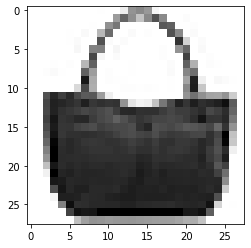

In [12]:
test_image_2d = np.resize(test_image, (28, 28) )
plt.imshow( test_image_2d, cmap=plt.cm.binary)

In [13]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 784)

In [14]:
result = model.predict( test_image_batch, batch_size=1, verbose=1)
result

1/1 [==============================] - 0s 28ms/step


array([[1.4888341e-11, 3.1238807e-23, 8.1397444e-17, 1.6442656e-18,
        1.6187870e-13, 1.4018200e-17, 1.5499515e-17, 3.2740570e-18,
        1.0000000e+00, 6.4027063e-21]], dtype=float32)

In [15]:
highest_index = np.argmax(result, axis=1)[0]
label_names[highest_index]

'Bag'